<a href="https://colab.research.google.com/github/siva-sankar-a/erav1/blob/main/session_7_8k_15_epochs/Session_7_initial_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ERA V1 Session 7
## Refer [link](https://github.com/siva-sankar-a/erav1/blob/main/session_7_8k_15_epochs/README.md) for further documentation

## Cloning the Github repository
## [Session 7](https://github.com/siva-sankar-a/erav1.git)

In [1]:
!git clone https://github.com/siva-sankar-a/erav1.git

Cloning into 'erav1'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 161 (delta 9), reused 1 (delta 1), pack-reused 140
Receiving objects: 100% (161/161), 563.41 KiB | 15.23 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [2]:
%cd /content/erav1

/content/erav1


In [3]:
!git pull

Already up to date.


## Adding the session folder to path in order to access the functions defined

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import sys

In [6]:
sys.path.append('/content/erav1/session_6_multiple_architectures_mnist/')

In [7]:
import importlib

In [8]:
import utils as U

In [9]:
U = importlib.reload(U)

## Get device

In [33]:
device = U.get_device()
print(device)

CUDA Available? True
cuda


In [10]:
import pandas as pd

In [11]:
pd.options.plotting.backend = "plotly"

## Get train and test transforms

In [12]:
train_transforms = U.get_train_transforms()
test_transforms = U.get_test_transforms()

In [13]:
from torchvision import datasets, transforms

In [14]:
from torch.utils.data import WeightedRandomSampler

In [15]:
train_transforms = transforms.Compose([
                                    transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                    # transforms.ElasticTransform(alpha=100.0, sigma=5.0, interpolation=transforms.InterpolationMode.NEAREST),
                                    # transforms.RandomInvert(p=0.5),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                    ])

In [16]:
test_transforms = transforms.Compose([
                                    # transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                    ])

## Get dataset

In [17]:
train_dataset = U.get_train_dataset(train_transforms)
test_dataset = U.get_test_dataset(test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 218527396.24it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 103534781.05it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 72164568.23it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2264684.83it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



## Get train and test dataloader

In [18]:
import torch

In [19]:
label_weights = { 0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}

In [20]:
_weights = [label_weights[label] for label in train_dataset.targets.cpu().tolist()]

In [21]:
batch_size = 128
sampler = torch.utils.data.sampler.WeightedRandomSampler(_weights, len(train_dataset), replacement=False)

In [22]:
kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

train_dataloader = U.get_train_dataloader(train_dataset, sampler=sampler, **kwargs)
test_dataloader = U.get_test_dataloader(test_dataset, **kwargs)

## Display image grid

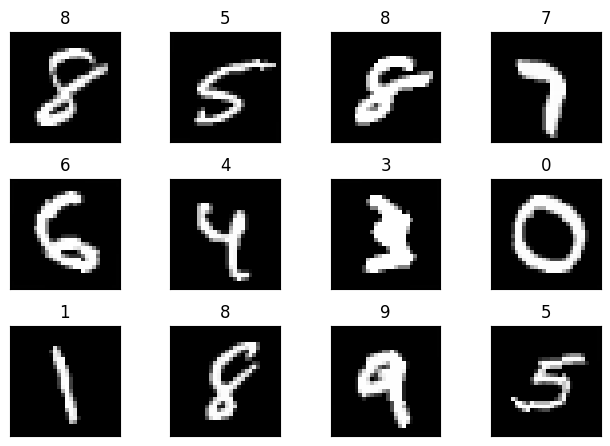

In [23]:
U.show_image_grid(train_dataloader)

In [24]:
!git clone https://github.com/Fangyh09/pytorch-receptive-field.git

Cloning into 'pytorch-receptive-field'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 111 (delta 37), reused 23 (delta 23), pack-reused 67
Receiving objects: 100% (111/111), 27.59 KiB | 13.80 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [25]:
sys.path.append('/content/erav1/pytorch-receptive-field')

In [26]:
from torch_receptive_field import receptive_field

In [27]:
import torch.nn as nn
import torch.nn.functional as F

In [37]:
class Net(nn.Module):

    '''
    This class implements the neural network model

    Usage:
    >>> device = ...
    >>> model = Net().to('cpu')
    '''

    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = self.conv3x3_bn_dropout(1, 8, padding=1)
        self.conv2 = self.conv3x3_bn_dropout(8, 8)

        self.squeeze1 = self.conv1x1(8, 1)

        self.conv3 = self.conv3x3_bn_dropout(1, 8, padding=1)
        self.conv4 = self.conv3x3_bn_dropout(8, 8)
        self.conv5 = self.conv3x3_bn_dropout(8, 8)
        self.conv6 = self.conv3x3_bn_dropout(8, 8, stride=2)

        self.squeeze2 = self.conv1x1(8, 1)

        self.conv7 = self.conv3x3_bn_dropout(1, 8, padding=1)
        self.conv8 = self.conv3x3_bn_dropout(8, 8)
        self.conv9 = self.conv3x3_bn_dropout(8, 16)
        self.conv10 = self.conv3x3_bn_dropout(16, 16)

        self.gap = nn.AvgPool2d(4)
        self.mixer = nn.Sequential(
            self.conv1x1(16, 10),
        )


    def conv3x3_bn_dropout(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0, bias=False, dropout=None):
          if dropout:
            return nn.Sequential(
                self.conv3x3(in_channels, out_channels, kernel_size, stride, padding, bias),
                nn.ReLU(),
                nn.BatchNorm2d(out_channels),
                nn.Dropout(dropout),
                )
          else:
            return nn.Sequential(
                self.conv3x3(in_channels, out_channels, kernel_size, stride, padding, bias),
                nn.ReLU(),
                nn.BatchNorm2d(out_channels),
                )

    def conv3x3(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0, bias=False):
          return nn.Conv2d(in_channels,
                    out_channels,
                    kernel_size=kernel_size,
                    stride=stride,
                    padding=padding,
                    bias=bias)

    def conv1x1(self, in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False):
          return nn.Conv2d(in_channels,
                    out_channels,
                    kernel_size=kernel_size,
                    stride=stride,
                    padding=padding,
                    bias=bias)


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.squeeze1(x)

        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = self.squeeze2(x)

        x = self.conv7(x)
        x = self.conv8(x)
        x = self.conv9(x)
        x = self.conv10(x)

        x = self.gap(x)
        x = self.mixer(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=1)

## Generate model summary

In [38]:
model = Net().to('cpu')
U.show_summary(model, 1024, 'cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1024, 8, 28, 28]              72
              ReLU-2          [1024, 8, 28, 28]               0
       BatchNorm2d-3          [1024, 8, 28, 28]              16
            Conv2d-4          [1024, 8, 26, 26]             576
              ReLU-5          [1024, 8, 26, 26]               0
       BatchNorm2d-6          [1024, 8, 26, 26]              16
            Conv2d-7          [1024, 1, 26, 26]               8
            Conv2d-8          [1024, 8, 26, 26]              72
              ReLU-9          [1024, 8, 26, 26]               0
      BatchNorm2d-10          [1024, 8, 26, 26]              16
           Conv2d-11          [1024, 8, 24, 24]             576
             ReLU-12          [1024, 8, 24, 24]               0
      BatchNorm2d-13          [1024, 8, 24, 24]              16
           Conv2d-14          [1024, 8,

In [39]:
receptive_field(model.cpu(), input_size=(1, 28, 28), device='cpu')

------------------------------------------------------------------------------
        Layer (type)    map size      start       jump receptive_field 
        0               [28, 28]        0.5        1.0             1.0 
        1               [28, 28]        0.5        1.0             3.0 
        2               [28, 28]        0.5        1.0             3.0 
        3               [28, 28]        0.5        1.0             3.0 
        4               [26, 26]        1.5        1.0             5.0 
        5               [26, 26]        1.5        1.0             5.0 
        6               [26, 26]        1.5        1.0             5.0 
        7               [26, 26]        1.5        1.0             5.0 
        8               [26, 26]        1.5        1.0             7.0 
        9               [26, 26]        1.5        1.0             7.0 
        10              [26, 26]        1.5        1.0             7.0 
        11              [24, 24]        2.5        1.0   

OrderedDict([('0',
              OrderedDict([('j', 1.0),
                           ('r', 1.0),
                           ('start', 0.5),
                           ('conv_stage', True),
                           ('output_shape', [-1, 1, 28, 28])])),
             ('1',
              OrderedDict([('j', 1.0),
                           ('r', 3.0),
                           ('start', 0.5),
                           ('input_shape', [-1, 1, 28, 28]),
                           ('output_shape', [-1, 8, 28, 28])])),
             ('2',
              OrderedDict([('j', 1.0),
                           ('r', 3.0),
                           ('start', 0.5),
                           ('input_shape', [-1, 8, 28, 28]),
                           ('output_shape', [-1, 8, 28, 28])])),
             ('3',
              OrderedDict([('j', 1.0),
                           ('r', 3.0),
                           ('start', 0.5),
                           ('input_shape', [-1, 8, 28, 28]),
             

## Training

In [34]:
model = Net().to(device)

In [35]:
import torch.optim as optim

In [36]:
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)
num_epochs = 20

metrics = { 'train_acc': [], 'train_losses': [],
            'test_acc': [], 'test_losses': [] }

for epoch in range(1, num_epochs + 1):
    print(f'Epoch {epoch}')
    U.train(model, device, train_dataloader, optimizer, metrics)
    U.test(model, device, test_dataloader, metrics)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.1988 Batch_id=468 Accuracy=88.25: 100%|██████████| 469/469 [00:30<00:00, 15.36it/s]


              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1050
           1       0.99      0.98      0.98      1144
           2       0.98      0.95      0.96      1061
           3       0.94      0.98      0.96       978
           4       0.98      0.96      0.97      1002
           5       0.98      0.94      0.96       925
           6       0.92      0.99      0.95       898
           7       0.96      0.97      0.97      1021
           8       0.95      0.98      0.96       947
           9       0.95      0.98      0.96       974

    accuracy                           0.96     10000
   macro avg       0.96      0.97      0.96     10000
weighted avg       0.97      0.96      0.96     10000

Test set: Average loss: 0.1063, Accuracy: 9649/10000 (96.49%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2


Train: Loss=0.1822 Batch_id=468 Accuracy=95.12: 100%|██████████| 469/469 [00:24<00:00, 18.85it/s]


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1030
           1       1.00      0.97      0.98      1172
           2       0.97      0.98      0.97      1026
           3       0.98      0.96      0.97      1029
           4       0.97      0.99      0.98       957
           5       0.94      0.99      0.97       851
           6       0.94      0.99      0.96       907
           7       0.98      0.96      0.97      1051
           8       0.97      0.97      0.97       978
           9       0.96      0.97      0.97       999

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Test set: Average loss: 0.0888, Accuracy: 9712/10000 (97.12%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3


Train: Loss=0.1705 Batch_id=468 Accuracy=96.11: 100%|██████████| 469/469 [00:24<00:00, 19.14it/s]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1006
           1       0.99      0.99      0.99      1141
           2       0.99      0.97      0.98      1050
           3       0.98      0.98      0.98      1015
           4       1.00      0.97      0.98      1008
           5       0.97      0.99      0.98       876
           6       0.98      0.98      0.98       954
           7       0.98      0.98      0.98      1020
           8       0.96      0.98      0.97       954
           9       0.95      0.99      0.97       976

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Test set: Average loss: 0.0647, Accuracy: 9792/10000 (97.92%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4


Train: Loss=0.1530 Batch_id=468 Accuracy=96.52: 100%|██████████| 469/469 [00:24<00:00, 19.17it/s]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       989
           1       0.99      0.99      0.99      1142
           2       0.98      0.98      0.98      1031
           3       0.98      0.98      0.98      1009
           4       0.96      0.99      0.98       952
           5       0.98      0.98      0.98       897
           6       0.97      0.99      0.98       935
           7       0.99      0.97      0.98      1051
           8       0.98      0.98      0.98       976
           9       0.98      0.97      0.97      1018

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Test set: Average loss: 0.0551, Accuracy: 9829/10000 (98.29%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5


Train: Loss=0.2702 Batch_id=468 Accuracy=96.82: 100%|██████████| 469/469 [00:24<00:00, 19.27it/s]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       1.00      0.99      0.99      1148
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1008
           4       0.98      0.99      0.99       973
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       953
           7       0.99      0.98      0.99      1038
           8       0.97      0.99      0.98       952
           9       0.98      0.98      0.98      1004

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Test set: Average loss: 0.0492, Accuracy: 9840/10000 (98.40%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 6


Train: Loss=0.1124 Batch_id=468 Accuracy=97.03: 100%|██████████| 469/469 [00:24<00:00, 19.15it/s]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1006
           1       1.00      0.98      0.99      1156
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99       996
           4       0.98      0.99      0.99       974
           5       0.98      0.99      0.98       885
           6       0.98      0.99      0.98       944
           7       0.99      0.97      0.98      1056
           8       0.97      0.99      0.98       961
           9       0.97      0.99      0.98       990

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Test set: Average loss: 0.0515, Accuracy: 9831/10000 (98.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1249 Batch_id=468 Accuracy=97.54: 100%|██████████| 469/469 [00:25<00:00, 18.21it/s]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       993
           1       1.00      0.99      0.99      1142
           2       0.99      0.99      0.99      1033
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       981
           5       0.99      0.99      0.99       889
           6       0.98      1.00      0.99       941
           7       0.99      0.98      0.99      1039
           8       0.99      0.99      0.99       972
           9       0.98      0.99      0.98      1000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0355, Accuracy: 9888/10000 (98.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0879 Batch_id=468 Accuracy=97.73: 100%|██████████| 469/469 [00:24<00:00, 19.07it/s]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       988
           1       1.00      0.99      0.99      1143
           2       0.99      0.99      0.99      1031
           3       0.99      0.99      0.99      1009
           4       0.99      0.99      0.99       980
           5       0.99      0.99      0.99       890
           6       0.98      1.00      0.99       943
           7       0.99      0.98      0.98      1044
           8       0.99      0.98      0.99       977
           9       0.97      0.99      0.98       995

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0361, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1810 Batch_id=468 Accuracy=97.82: 100%|██████████| 469/469 [00:24<00:00, 19.14it/s]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       996
           1       1.00      0.99      0.99      1139
           2       0.99      0.99      0.99      1036
           3       0.99      0.99      0.99      1008
           4       0.99      0.99      0.99       979
           5       0.98      0.99      0.99       886
           6       0.98      0.99      0.99       950
           7       0.99      0.98      0.98      1037
           8       0.98      0.99      0.99       972
           9       0.98      0.99      0.98       997

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0361, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0227 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:24<00:00, 19.27it/s]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       989
           1       1.00      0.99      0.99      1143
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1008
           4       0.99      0.99      0.99       981
           5       0.99      0.99      0.99       892
           6       0.98      1.00      0.99       942
           7       0.99      0.98      0.98      1040
           8       0.98      0.99      0.99       967
           9       0.98      0.98      0.98      1006

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0353, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0381 Batch_id=468 Accuracy=97.94: 100%|██████████| 469/469 [00:24<00:00, 19.20it/s]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       991
           1       1.00      0.99      0.99      1142
           2       0.99      0.99      0.99      1034
           3       0.99      0.99      0.99      1009
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      1.00      0.99       941
           7       0.99      0.98      0.99      1038
           8       0.99      0.99      0.99       973
           9       0.98      0.99      0.98       998

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0350, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0571 Batch_id=468 Accuracy=97.80: 100%|██████████| 469/469 [00:24<00:00, 19.12it/s]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       989
           1       1.00      0.99      0.99      1145
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1011
           4       0.99      0.99      0.99       981
           5       0.98      0.99      0.99       889
           6       0.98      0.99      0.99       945
           7       0.99      0.98      0.99      1038
           8       0.99      0.99      0.99       972
           9       0.98      0.99      0.98       998

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0347, Accuracy: 9883/10000 (98.83%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0726 Batch_id=468 Accuracy=97.88: 100%|██████████| 469/469 [00:25<00:00, 18.43it/s]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       991
           1       1.00      0.99      0.99      1145
           2       0.99      0.99      0.99      1034
           3       0.99      0.99      0.99      1008
           4       0.99      0.99      0.99       980
           5       0.98      0.99      0.99       888
           6       0.98      1.00      0.99       944
           7       0.99      0.98      0.99      1039
           8       0.99      0.99      0.99       970
           9       0.98      0.99      0.98      1001

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0349, Accuracy: 9885/10000 (98.85%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.0157 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:24<00:00, 19.12it/s]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       993
           1       1.00      0.99      0.99      1144
           2       0.99      0.99      0.99      1038
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       980
           5       0.98      0.99      0.99       888
           6       0.98      1.00      0.99       943
           7       0.99      0.98      0.99      1036
           8       0.99      0.99      0.99       973
           9       0.98      0.99      0.98       995

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0349, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0924 Batch_id=468 Accuracy=97.94: 100%|██████████| 469/469 [00:24<00:00, 19.11it/s]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       993
           1       1.00      0.99      0.99      1144
           2       0.99      0.99      0.99      1034
           3       0.99      0.99      0.99      1006
           4       0.99      0.99      0.99       979
           5       0.99      0.99      0.99       890
           6       0.98      1.00      0.99       943
           7       0.99      0.98      0.99      1040
           8       0.99      0.99      0.99       971
           9       0.98      0.99      0.98      1000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0343, Accuracy: 9890/10000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0724 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:24<00:00, 19.14it/s]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       991
           1       1.00      0.99      0.99      1142
           2       0.99      0.99      0.99      1038
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       978
           5       0.99      0.99      0.99       890
           6       0.98      1.00      0.99       943
           7       0.99      0.98      0.99      1038
           8       0.99      0.99      0.99       971
           9       0.98      0.99      0.98       999

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0343, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0761 Batch_id=468 Accuracy=97.87: 100%|██████████| 469/469 [00:24<00:00, 19.06it/s]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       992
           1       1.00      0.99      0.99      1141
           2       0.99      0.99      0.99      1039
           3       0.99      0.99      0.99      1009
           4       0.99      0.99      0.99       978
           5       0.99      0.99      0.99       890
           6       0.98      1.00      0.99       944
           7       0.99      0.98      0.99      1037
           8       0.99      0.99      0.99       972
           9       0.98      0.99      0.98       998

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0337, Accuracy: 9888/10000 (98.88%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.1139 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:26<00:00, 17.99it/s]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       990
           1       1.00      0.99      0.99      1144
           2       0.99      0.99      0.99      1037
           3       0.99      0.99      0.99      1009
           4       0.99      0.99      0.99       979
           5       0.99      0.99      0.99       891
           6       0.98      1.00      0.99       943
           7       0.99      0.98      0.99      1037
           8       0.99      0.99      0.99       973
           9       0.98      0.99      0.98       997

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0337, Accuracy: 9890/10000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 19


Train: Loss=0.0501 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:24<00:00, 19.19it/s]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       990
           1       1.00      0.99      0.99      1144
           2       0.99      0.99      0.99      1037
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       978
           5       0.99      0.99      0.99       890
           6       0.98      1.00      0.99       943
           7       0.99      0.98      0.99      1037
           8       0.99      0.99      0.99       973
           9       0.98      0.99      0.98       998

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0342, Accuracy: 9888/10000 (98.88%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 20


Train: Loss=0.0499 Batch_id=468 Accuracy=97.93: 100%|██████████| 469/469 [00:23<00:00, 19.74it/s]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       990
           1       1.00      0.99      0.99      1141
           2       0.99      0.98      0.99      1041
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       979
           5       0.99      0.99      0.99       890
           6       0.98      0.99      0.99       945
           7       0.99      0.98      0.99      1034
           8       0.99      0.99      0.99       973
           9       0.98      0.99      0.98       997

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0333, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-04.


## Display Results

In [ ]:
df = pd.DataFrame(metrics)

In [ ]:
df[['train_losses', 'test_losses']].plot()

In [ ]:
df[['train_acc', 'test_acc']].plot()